## Predicting The Stock Market

In [4]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('sphist.csv')
df['DateTime'] = pd.to_datetime(df.Date)
df_ordered = df.sort_values('DateTime', ascending=True)
df_ordered['index'] = range(0,df.shape[0],1)
df_ordered.set_index(['index'])
print (df_ordered.head(5))
df_no_NA = df_ordered.dropna(axis=0)
print ('-----------------------')
print ('NaN check table')
print ('-----------------------')
print (df_no_NA.isnull().sum())

             Date   Open   High    Low  Close     Volume  Adj Close  \
16589  1950-01-03  16.66  16.66  16.66  16.66  1260000.0      16.66   
16588  1950-01-04  16.85  16.85  16.85  16.85  1890000.0      16.85   
16587  1950-01-05  16.93  16.93  16.93  16.93  2550000.0      16.93   
16586  1950-01-06  16.98  16.98  16.98  16.98  2010000.0      16.98   
16585  1950-01-09  17.08  17.08  17.08  17.08  2520000.0      17.08   

        DateTime  index  
16589 1950-01-03      0  
16588 1950-01-04      1  
16587 1950-01-05      2  
16586 1950-01-06      3  
16585 1950-01-09      4  
-----------------------
NaN check table
-----------------------
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
DateTime     0
index        0
dtype: int64


In [6]:
df_no_NA['date_after_april1_2015'] = df_no_NA.DateTime > datetime(year=2015, month=4, day=1)
mean_5day = df_no_NA['Close'].rolling(window=5,center=False).mean()
mean_365day = df_no_NA['Close'].rolling(window=365,center=False).mean()
std_5day = df_no_NA['Close'].rolling(window=5,center=False).std()
std_365day = df_no_NA['Close'].rolling(window=365,center=False).std()
mean_ratio=mean_5day/mean_365day
std_ratio=std_5day/std_365day
df_ordered['data_mean_5day'] = mean_5day
df_ordered['data_mean_365day'] = mean_365day
df_ordered['data_mean_ratio'] = mean_ratio
df_ordered['data_std_5day'] = std_5day
df_ordered['data_std_365day'] = std_365day
df_ordered['data_std_ratio'] = std_ratio
df_new = df_ordered[df_ordered["DateTime"] > datetime(year=1951, month=1, day=2)]
df_no_NA = df_new.dropna(axis=0)
print (df_no_NA.head(5))

             Date       Open       High        Low      Close     Volume  \
16225  1951-06-18  22.049999  22.049999  22.049999  22.049999  1050000.0   
16224  1951-06-19  22.020000  22.020000  22.020000  22.020000  1100000.0   
16223  1951-06-20  21.910000  21.910000  21.910000  21.910000  1120000.0   
16222  1951-06-21  21.780001  21.780001  21.780001  21.780001  1100000.0   
16221  1951-06-22  21.549999  21.549999  21.549999  21.549999  1340000.0   

       Adj Close   DateTime  index  data_mean_5day  data_mean_365day  \
16225  22.049999 1951-06-18    364          21.800         19.447726   
16224  22.020000 1951-06-19    365          21.900         19.462411   
16223  21.910000 1951-06-20    366          21.972         19.476274   
16222  21.780001 1951-06-21    367          21.960         19.489562   
16221  21.549999 1951-06-22    368          21.862         19.502082   

       data_mean_ratio  data_std_5day  data_std_365day  data_std_ratio  
16225         1.120954       0.256223

In [7]:
df_train = df_no_NA[df_no_NA['DateTime'] < datetime(year=2013, month=1, day=1)]
df_test = df_no_NA[df_no_NA['DateTime'] >= datetime(year=2013, month=1, day=1)]

## Linear Regression

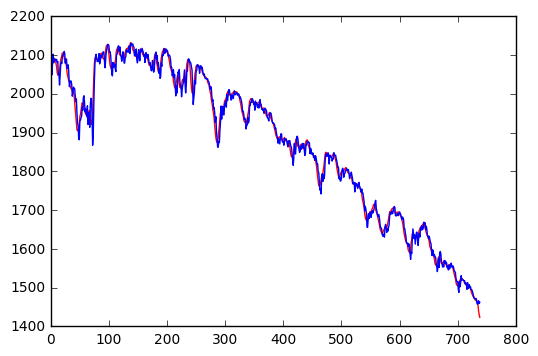

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
features = ['data_mean_5day', 'data_mean_365day', 'data_std_5day', 'data_std_365day','data_mean_ratio','data_std_ratio']
model.fit(df_train[features],df_train['Close'])
pred=model.predict(df_test[features])
plt.plot(df_test.index,pred,c='red')
plt.plot(df_test.index,df_test.Close,c='blue')
plt.show()

In [9]:
MAE = sum(abs(pred - df_test.Close))/len(pred)
print(MAE)
print(model.score(df_train[features],df_train.Close))

11.9787579713
0.999735486959


## 10 folds Cross_Validation

In [10]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
kf=KFold(len(df_no_NA),10)

C:\Users\Leo Li\AppData\Local\Programs\Python\Python35-32\Lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
accuracies=cross_val_score(model,df_no_NA[features],df_no_NA['Close'],scoring='mean_absolute_error',cv=kf)
print (-1*accuracies)
print (-1*np.mean(accuracies))

[  0.21981003   0.33414943   0.54130637   0.80956731   0.95751039
   2.00151846   2.68718066  12.05028365   9.96509219  11.49640033]
4.10628188346


### Analysis
The indicator that I generate for this linear regression model has really high performance from my personal view, the indicator "mean_ratio" and "std_ratio" is really has strong power to do that


## Support Vector Machine. SVR

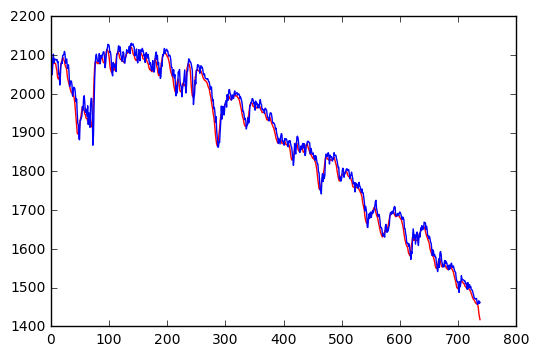

In [29]:
features_1=['Open','High','Low','Close','Volume','Adj Close']
from sklearn import svm
support_vector=svm.LinearSVR()
X=support_vector.fit(df_train[features],df_train['Close'])
pred_SVR=support_vector.predict(df_test[features])
plt.plot(df_test.index,pred_SVR,c='red')
plt.plot(df_test.index,df_test.Close,c='blue')
plt.show()

In [26]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
kf=KFold(len(df_no_NA),10)

## 10 folds Cross Validation ( features: moveing average(5,365), moving std(5,365), mean ratio and std ratio)

In [27]:
accuracies_feature_1=cross_val_score(support_vector,df_no_NA[features],df_no_NA['Close'],scoring='mean_absolute_error',cv=kf)
print (-1*accuracies_feature_1)
print (-1*np.mean(accuracies_feature_1))

[  0.21744928   1.1393018    1.22322317   0.81659715   1.57676893
   2.06130755   3.02095413  13.51700098  14.63753463  11.51918853]
4.97293261621


## 10 folds Cross Validation ( features: all basic labels, Open, Close......)

In [30]:
accuracies_feature_2=cross_val_score(support_vector,df_no_NA[features_1],df_no_NA['Close'],scoring='mean_absolute_error',cv=kf)
print (-1*accuracies_feature_2)
print (-1*np.mean(accuracies_feature_2))

[  8.45923611e+00   3.09283341e+01   4.07798663e+01   1.92646980e+02
   4.10193135e+02   1.06604561e+03   1.02646893e+03   7.08788228e+03
   5.36130452e+04   6.59084910e+04]
12938.49406


### Analysis 

After I tested the different features (one for moving average stuff, and the other one is all basic labels), the frist one is way more stronger than the latter one. However, the $cross\_val\_socre()$ still gave more apperaciation to the Linear Regression in stead of SVM